In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from xgboost.sklearn import XGBClassifier

In [2]:
csv = pd.read_csv('./data/winequality-red.csv')

In [153]:
csv.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
csv.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [53]:
corr_df = csv.corr().unstack().sort_values(ascending=False)

In [55]:
corr_df['quality']

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
dtype: float64

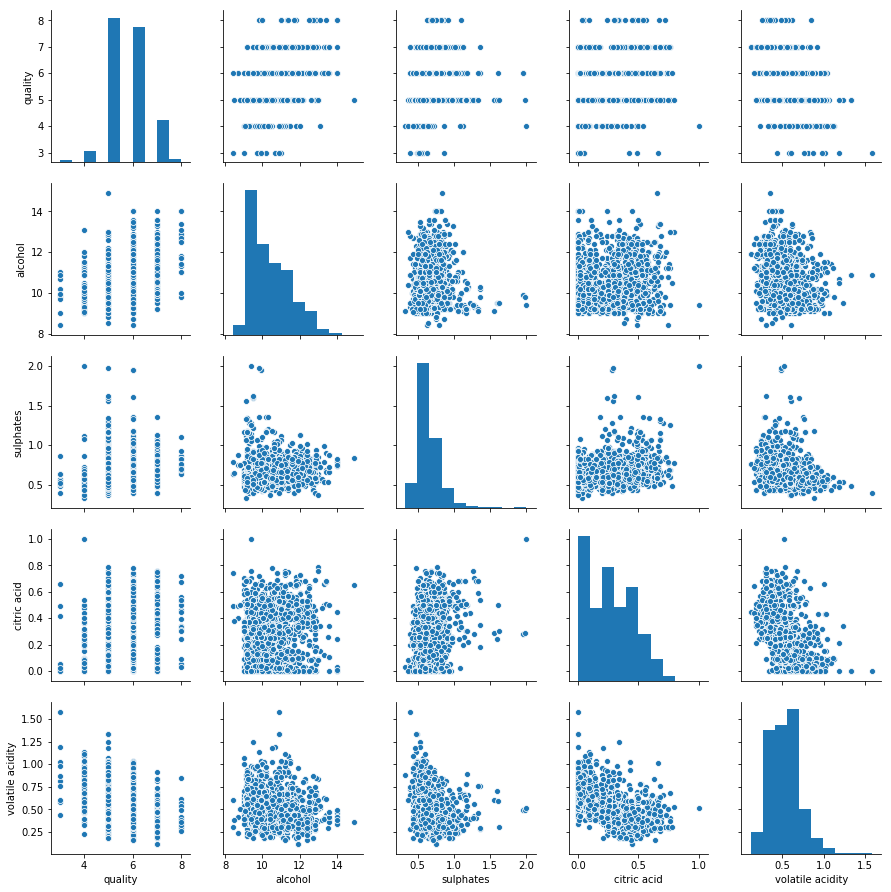

In [172]:
sns.pairplot(csv[['quality', 'alcohol', 'sulphates', 'citric acid','volatile acidity']])

In [43]:
col_list = a['quality'].index[0:5].values.tolist()

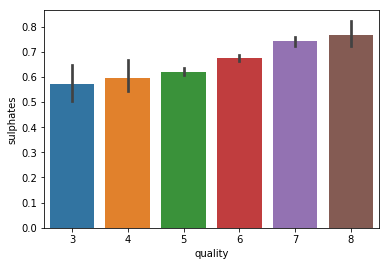

In [176]:
sns.barplot(x = 'quality', y = 'sulphates', data = csv)

In [202]:
X = csv.drop(['quality'], axis=1)
y = csv['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [203]:
std_list = ['free sulfur dioxide', 'total sulfur dioxide','citric acid', 'residual sugar']
minmax_list = ['density']
passthru_list = ['fixed acidity', 'volatile acidity',
                 'chlorides', 'alcohol', 'sulphates', 'pH']

In [204]:
pipe = Pipeline([
    ("features", FeatureUnion([
        ('standardize', make_pipeline(utils.ColumnSelector(std_list),StandardScaler())),
        #('minmax', make_pipeline(utils.ColumnSelector(minmax_list),MinMaxScaler())),
        ('do_nothing',make_pipeline(utils.ColumnSelector(passthru_list)))
    ]))
])

In [205]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [206]:
model_list = [
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [207]:
for model in model_list:
    model = model.fit(X_train, y_train)

/home/wences/Downloads/conda/envs/kaggle/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/wences/Downloads/conda/envs/kaggle/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/wences/Downloads/conda/envs/kaggle/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [208]:
acc_list = []
for model in model_list:
    acc_list.append(accuracy_score(y_true=y_test, y_pred=model.predict(X_test)))

In [209]:
acc_list

[0.61875, 0.678125, 0.565625, 0.66875, 0.671875, 0.671875, 0.6375]